In [202]:
#ESSENSIALS


#importing the needed libraries
import pickle
import math
import numpy as np
import os

#importing matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import winter

%matplotlib inline
#gets pickle files from directories
pickleContents = open ( r"C:\Users\DGama\OneDrive\Documents\School\poly\SURP-2024\NS_SURP2024\week_5-6\Ueostable.pk", "rb" )
eos_db = pickle.load(pickleContents)
#print (pickle.keys())

In [203]:
#GETTING EOS

#My though is to have a 2D list that itself contain the p and rho list for each EOS

#maybe copy and paste EVERY KEY manually

#EOS_keys = ["DNS_CMF_wcrust/", "DS_CMF1_wcrust/", "DS_CMF2_wcrust/", "DS_CMF3_wcrust/", "DS_CMF4_wcrust/", 
#            "DS_CMF5_wcrust/", "DS_CMF6_wcrust/", "DS_CMF7_wcrust/", "DS_CMF8_wcrust/", "OPGR_DDHdeltaY4/",
#            "OPGR_GM1Y4/", "OPGR_GM1Y5/", "OPGR_GM1Y6/", "QMC-RMF1/", "QMC-RMF2/", "QMC-RMF3/", "QMC-RMF4/",
#            "R_DD2YDelta_1.1/", "R_DD2YDelta_1.2/", "R_DD2YDelta_1.3/"] 

EOS_keys = []
#ps_local = []
#rhos_local =[]
rhos_cs=[2e14,2.25e14,2.5e14,2.75e14,3e14,3.25e14,3.5e14,3.75e14,4e14,4.25e14,4.5e14,4.75e14,5e14,5.5e14,
                6e14,6.5e14,7e14,7.5e14,8e14,8.5e14,9e14,9.5e14,10e14,10.5e14,
                11e14,12e14,13e14,14e14,15e14,16e14,17e14,18e14,19e14,20e14,
                21e14,22e14,23e14,24e14,25e14,26e14,27e14,28e14,29e14,30e14]
#fill out every EOS name
n = 0
for i in eos_db.keys():
    n = n+1
    EOS_keys.append(i) 
print (n)    
print(EOS_keys)


48
['ABHI(QMC-RMF1)/', 'ABHI(QMC-RMF2)/', 'ABHI(QMC-RMF3)/', 'ABHI(QMC-RMF4)/', 'BFH(QHC19-A)/', 'BFH(QHC19-B)/', 'BFH(QHC19-C)/', 'BFH(QHC19-D)/', 'BHK(QHC18)/', 'BL_wcrust/', 'CMGO(GDFM-2)/', 'DNS_CMF_wcrust/', 'DS_CMF1_wcrust/', 'DS_CMF2_wcrust/', 'DS_CMF3_wcrust/', 'DS_CMF4_wcrust/', 'DS_CMF5_wcrust/', 'DS_CMF6_wcrust/', 'DS_CMF7_wcrust/', 'DS_CMF8_wcrust/', 'GMSR(H1)/', 'GMSR(H2)/', 'GMSR(H3)/', 'GMSR(H4)/', 'GMSR(H5)/', 'GMSR(H7)/', 'KBH(QHC21-A)/', 'KBH(QHC21-B)/', 'KBH(QHC21-C)/', 'KBH(QHC21-D)/', 'OPGR_DDHdeltaY4/', 'OPGR_GM1Y4/', 'OPGR_GM1Y5/', 'OPGR_GM1Y6/', 'PCGS(PCSB0)/', 'PCGS(PCSB1)/', 'PCGS(PCSB2)/', 'PCP(BSK22)/', 'R_DD2YDelta_1.1/', 'R_DD2YDelta_1.2/', 'R_DD2YDelta_1.3/', 'RG(SKa)/', 'RG(SKb)/', 'RG(SKI2)/', 'RG(SKI3)/', 'RG(SKI4)/', 'RG(SKI5)/', 'RG(SKI6)/']


In [204]:
#getting ps and rho from the EOS

def get_p_local(key):
    return eos_db[key]['ps']

In [205]:
#getting ps and rho from the EOS

def get_rho_local(key):
    return eos_db[key]['rhos']

In [206]:
#rhos to ps subroutine
def rho_to_ps(rho_target):

    #rho_local = get_rho_local(eos_key)
    for x in range(len(rho_local)-1):
        
        #p_local = x
    #first case: when the p_targer is less that the first value of the p_local
        if rho_target < rho_local[0]:
                rho_target = rho_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if rho_target >= rho_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                rho_target = rho_local[-1]
                x = len(rho_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if rho_local[x] < rho_target and rho_local[x+1] > rho_target:
                #local = x
                break
    #Equation used:  
    #print("p_Local: ",p_local[x])
    p_target = p_local[x] + (((p_local[x+1] - p_local[x]) / (rho_local[x+1] - rho_local[x])) * (rho_target - rho_local[x]))
    
    return p_target
##

In [207]:
#ps_to_rhos routine
def ps_to_rho(p_target):

    #p_local = get_p_local(eos_key)
    #rho_local = x
    for x in range(len(rho_local)-1):
    #first case: when the p_targer is less that the first value of the p_local
        if p_target < p_local[0]:
                p_target = p_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if p_target >= p_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                p_target = p_local[-1]
                x = len(p_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if p_local[x] < p_target and p_local[x+1] > p_target:
                #local = x
                break
   # print("rho_Local:",rho_local[x],)
    rho_target = rho_local[x] + (((rho_local[x+1] - rho_local[x]) / (p_local[x+1] - p_local[x])) * (p_target - p_local[x]))
    return rho_target
##

In [8]:
#dp function
def dPdr(ps, rhos ,rs,  ms):
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi

    
    mr = ms
    r = rs
    rho = rhos
    p = ps
    #dPdr equation
    dPdr = (-(G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+((4*pi*r**3*p)/(mr*c**2)))*((1-((2*G*mr)/(c**2*r)))**-1)
    return dPdr

In [9]:
#dm function
def dmdr(rs,rhos):
    """Find the dmdr for future equations

    INPUT: rs as radius, and rhos for density    
    OUTPUT: the dmdr using the corresponding values
    NOTES: using 'math.pi' for calculations
    """
    r = rs
    rho = rhos
    #dmdr equation
    dmdr = 4*math.pi*r**2*rho
    return dmdr

In [10]:
#FIND MASS AND FIND RADIUS
def find_mass(ms):
    return ms[-1]
def find_radius(rs):
    return rs[-1]

In [11]:
#Runge-Kutta Routine

def runge_kutta(rho_c,dr,loops,debug=0):
    """
    INPUT:
        'rho_c' as 'rho'(density).'dr' as r,'loops' as the number of iterations preformed, set to 10000 by deafult.
    OUTPUT:
        rs,rhos,ps,ms arrays, containing the gatherd data from doing Runge Kutta method on Tolman
        Oppenheimer Volkoff equation. 
        
    """ 
    
    #get the values from the end user to the function
    r = dr
    rho = rho_c
    #Constants
    #
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi
    #
    p = rho_to_ps(rho)
    #value of mr, im assuming that this will remain the same from euler method
    mr = 4.0 /3.0 * pi * r**3 * rho
    #
    #array creation for storing the values for model analizys
    rs = [r]
    rhos = [rho]
    ps = [p]
    ms = [mr]
   ### 

   #To the poor person reading this code in a year or 2, i added the ability to declare the loop iterations because I felt lazy 
   #from having tochange that value every time i changed dr,I dont know why i did not do this to begin with but i digress
   # Dingo 24/6/2024


   #another note, I added a bool called debug, so it would not print out if the limit of the function has been broken every time i run this
   #subroutine, if you modify this then that oculd eb used for other debug purposes i suppose
   # Dingo 26/6/2026
    for i in range (loops):

        #rk i function
        dPdr_1 = dPdr(p,rho,r,mr)
        dmdr_1 = dmdr(r,rho)
        #rk i values
        mr_1 = mr + dmdr_1 * dr*(1/2)
        p_1 = p + dPdr_1 * dr*(1/2)

        rho_1 = ps_to_rho(p_1)
        r_1 = r + dr*(1/2)



        #rk ii function
        dPdr_2 = dPdr(p_1,rho_1,r_1,mr_1)
        dmdr_2 = dmdr(r_1,rho_1)
        #rk ii values

        mr_2 = mr_1 + dmdr_2 * dr*(1/2)
        p_2 = p_1 + dPdr_2 * dr*(1/2)

        rho_2 = ps_to_rho(p_2)
        r_2 = r_1 + dr*(1/2)



        #rk iii function
        dPdr_3 = dPdr(p_2,rho_2,r_2,mr_2)
        dmdr_3 = dmdr(r_2,rho_2)
        #rk iii values
        mr_3 = mr_2 + dmdr_3 * dr
        p_3 = p_2 + dPdr_3 * dr

        rho_3 = ps_to_rho(p_3)
        r_3 = r_2 + dr


        
        #rk iv function
        dPdr_4 = dPdr(p,rho,r,mr)
        dmdr_4 = dmdr(r,rho)
        #rk iv values
        mr_4 = mr_3 + dmdr_4 * dr*(1/2)
        p_4 = p_3 + dPdr_4 * dr*(1/2)

        rho_4 = ps_to_rho(p_4)
        r_4 = r_3 + dr

        #get new values

        m_new = mr + ((dmdr_1/6)+(dmdr_2/3)+(dmdr_3/3)+(dmdr_4/6)) * dr
        r_new = r + dr
        p_new = p + ((dPdr_1/6)+(dPdr_2/3)+(dPdr_3/3)+(dPdr_4/6)) * dr
        
        rho_new = ps_to_rho(p_new)
# append the new data
        rs.append(r_new)
        ps.append(p_new)
        ms.append(m_new)
        rhos.append(rho_new)
        
        # replace old by your new values
        r = r_new
        rho = rho_new
        p = p_new
        mr = m_new
        if rho < 1e-4 * rho_c:
            #following 2 lines should be commented after debugging is done
            if debug == 1:
                print("break condition met!")
                print(rho , " < ", 1**-4*rho_c)
            break
    
    return rs, rhos, ps, ms     



In [12]:
#gen ns function
def gen_ns(rho_c,ds,loops):
    """
    INPUT:rho_c as density,ds as the radius, and eos_key, as 
    the corresponding Equation Of State

    OUTPUT:Return the arrays rs(radius) rhos(densities) Pressures(ps), and Masses(ms) 
    for other functions
    """
    rs, rhos, ps, ms = runge_kutta(rho_c,ds,loops)
    return rs,rhos,ps,ms

In [13]:
def print_ns_MR(radius,mass):

    #radius = np.array(radius) / 1e5
    #mass = np.array(mass) / 2e33
    fig, ax = plt.subplots(ncols=1, nrows=1)
    x = radius
    ax.set_xlabel('Radius rhos')
    # Y-axis values 
    y = mass
    ax.set_ylabel('Solar mass ms')
    # Function to plot 
    ax.plot(x, y, "-o")
    # function to show the plot 
    # plt.show()
    return plt


In [29]:
def gen_ns_MR(EOS):
        mass_cs = []   
        radius_cs = []
        for z in rhos_cs:
                #EOS_keys[key_nb]
                rs,rhos,ps,ms= gen_ns(z,2000,10000)
                mass_cs.append(find_mass(ms)/2e33)
                radius_cs.append(find_radius(rs)/1e5)
        return radius_cs, mass_cs

<module 'matplotlib.pyplot' from 'c:\\Users\\DGama\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

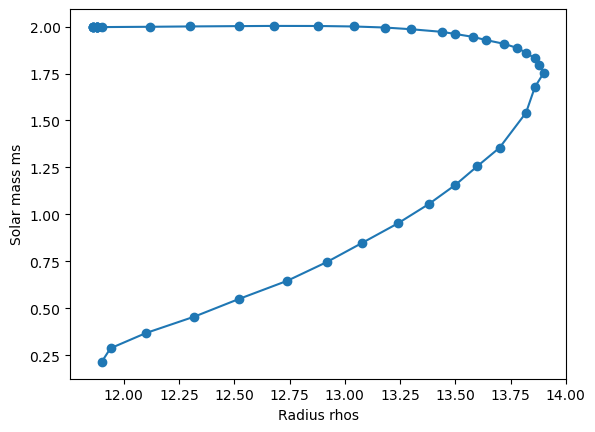

In [31]:

p_local = get_p_local('OPGR_GM1Y4/')
rho_local = get_rho_local('OPGR_GM1Y4/')
radius_10, mass_10=gen_ns_MR('OPGR_GM1Y4/')
print_ns_MR(radius_10,mass_10)

In [15]:
def output_file(EOS,rhos_c,rhos,rs,ps,ms):
    """ 
    INPUT:  take data from a genetated Neutron Star model
    OUTPUT: Store the information into a .txt document, to prevent from having to compile the data multiple times
    VARIABLES: EOS for the equation of state

    rhos_c for the current rho_cs value used for generating the data
    
    rhos,rs,ps, and ms are the list given as an output from the gen_ns function
    
    """
   #EOS = EOS_keys[1]
   #rhos_c = rhos_cs[1]
   #format the values for naming files
    rhos_c = "{:.2e}".format(rhos_c)
    EOS =EOS.rstrip('/') #if you do not strip the '/' then VS python will think that you are trying to open a directory

    file = open(str(EOS)+"_"+str(rhos_c)+".dat","w")
    file.write("Radius (cm)\t\tPressure (dyne/cm^2)\t\tMass (M☉)\t\tDensity (g/cm^3)\n")
    
    for i in range(len(rhos)):
       file.write("")
       # I made the write variables as it was bugging out when i tried to raw modify the data,   
       rs_w = "{:.8e}".format(rs[i])
       ps_w = "{:.8e}".format(ps[i])
       ms_w = "{:.8e}".format(ms[i])
       rhos_w ="{:.8e}".format(rhos[i])

       file.write(str(rs_w) +"\t\t"+str(ps_w) + "\t\t"+str(ms_w) + "\t\t"+str(rhos_w) + "\t\t \n")
    file.close()
    return

In [16]:
def print_summary(EOS, rhos_c,ms_t,rs_t,compact):
   
   EOS =EOS.rstrip('/') #if you do not strip the '/' then VS python will think that you are trying to open a directory

   file = open(str(EOS)+"_MR.dat", "a")
   # or "a" if you are testing, in the loop it is better to use "w" (write) 
   # so that the old (most likely incorrect results) will be overwritten
   # Only one file is needed for one EOS, because one line corresponds to one star model   
   #here would be a case for if the file already exist

   if os.path.getsize(str(EOS)+"_MR.dat") == 0:
      file.write("rho_c\t\tMass (M☉)\t\tRadius (cm)\t\tCompactness(GM/C^2R)\n")
   #format values for the document
   rhos_w = "{:.2e}".format(rhos_c)
   radius_w = "{:.8e}".format(rs_t)
   mass_w = "{:.8e}".format(ms_t)
   compact_w ="{:.8e}".format(compact)
   #rhos_cw = "{:.2e}".format(rhos_cs[i])
   file.write(rhos_w+"\t\t"+ mass_w+"\t\t"+ radius_w+"\t\t"+compact_w+"\n")# with appropriate formatting similar to the print_NS

   file.close()

In [17]:
#READ SUMMARY FUNTION
def read_summary(EOS):
    EOS =EOS.rstrip('/')
    file = open(str(EOS)+"_MR.dat", "r")
    #declare arrays for storing the data
    mass_t =[]
    radius_t =[]
    compact_t =[]
    #array created for st
    c_line =[]
    file.readline()
    #store the M, R and the compactness
    for line in file.readlines():
        c_line = line.split('\t\t')
        #store the data into list
        mass_t.append(float(c_line[1]))
        radius_t.append( float(c_line[2]))
        compact_t.append(float(c_line[3]))
    #turn the list into numpy arrays(makes stuff easier)
    mass_t =np.array(mass_t)
    radius_t = np.array(radius_t)
    compact_t = np.array(compact_t)

    file.close()
    return mass_t,radius_t,compact_t

In [201]:
#TO LOOP THOUGHH a SINGULA EOS

EOS = EOS_keys[1]
for i in range(len(rhos_cs)):
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8

    #obtain Values needed for the .dat file
    rhos_c = rhos_cs[i]
    #generate the neutron star for the EOS and rho_cs
    rs,rhos,ps,ms = gen_ns(rhos_c,2000,10000)

    #obtain the total mass, and radius from the generated value,
    ms_t = find_mass(ms)
    rs_t = find_radius(rs)

    #cal lthe output_file funct to generate the data
    
    output_file(EOS,rhos_c,rhos,rs,ps,ms) #keep comented for now
    #while we SHOULD do tihs for the EOS we dont have too much time to spare
    #calculate compactness
    compact = (G*ms_t)/(c**2*rs_t)
    #call print summmary for the EOS_MS.dat file
    #print_summary(EOS,rhos_c,ms_t,rs_t,compact)
print("test")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\DGama\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DGama\AppData\Local\Temp\ipykernel_49296\980857340.py", line 13, in <module>
    rs,rhos,ps,ms = gen_ns(rhos_c,2000,10000)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DGama\AppData\Local\Temp\ipykernel_49296\3976176794.py", line 10, in gen_ns
    rs, rhos, ps, ms = runge_kutta(rho_c,ds,loops)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DGama\AppData\Local\Temp\ipykernel_49296\209666109.py", line 90, in runge_kutta
    rho_4 = ps_to_rho(p_4)
            ^^^^^^^^^^^^^^
  File "C:\Users\DGama\AppData\Local\Temp\ipykernel_49296\2118825212.py", line None, in ps_to_rho
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\DGama\anaconda3\Lib\site-package

In [209]:
#FOR ALL EOS IN THE EOS_KEY LIST
#RUN THIS TO GENERATE THE EOS_MR FILES AGAIN(ALSO MAKE SURE THE ORIGINAL FILES ARE DELETED)DONT RUN OTHERWISE
for EOS in EOS_keys:
    for i in range(len(rhos_cs)):

        p_local = get_p_local(EOS)
        rho_local =get_rho_local(EOS)
        #speed of ligth
        c = 2.99792458e10
        #Gravitational constant
        G = 6.6743e-8

        #obtain Values needed for the .dat file
        rhos_c = rhos_cs[i]
        #generate the neutron star for the EOS and rho_cs
        rs,rhos,ps,ms = gen_ns(rhos_c,2000,10000)

        #obtain the total mass, and radius from the generated value,
        ms_t = find_mass(ms)
        rs_t = find_radius(rs)

        #cal lthe output_file funct to generate the data
        
        #output_file(EOS,rhos_c,rhos,rs,ps,ms) #keep comented for now

        #calculate compactness
        compact = (G*ms_t)/(c**2*rs_t)
        #call print summmary for the EOS_MS.dat file
        print_summary(EOS,rhos_c,ms_t,rs_t,compact)

In [18]:
EOS = EOS_keys[1]
mass_t,radius_t,compact_t = read_summary(EOS)
print (mass_t)
print(radius_t)
print (compact_t)

[3.99919623e+32 5.53288202e+32 7.17345511e+32 8.92423293e+32
 1.07198215e+33 1.25819699e+33 1.44450063e+33 1.63244001e+33
 1.81681645e+33 1.99890169e+33 2.17489050e+33 2.34594445e+33
 2.50943829e+33 2.81533005e+33 3.09061153e+33 3.33547656e+33
 3.55146368e+33 3.74084005e+33 3.90340163e+33 4.03775942e+33
 4.15314953e+33 4.25299244e+33 4.33959225e+33 4.41470563e+33
 4.47923517e+33 4.58340392e+33 4.66129441e+33 4.71890466e+33
 4.76069559e+33 4.79004273e+33 4.80958819e+33 4.82141194e+33
 4.82694276e+33 4.82759735e+33 4.81797111e+33 4.80913244e+33
 4.79819168e+33 4.78584864e+33 4.77214981e+33 4.75762744e+33
 4.74233731e+33 4.72639583e+33 4.71024821e+33]
[1174000. 1180000. 1198000. 1218000. 1240000. 1262000. 1280000. 1296000.
 1310000. 1322000. 1332000. 1342000. 1348000. 1358000. 1364000. 1366000.
 1364000. 1362000. 1358000. 1352000. 1344000. 1338000. 1330000. 1324000.
 1314000. 1298000. 1282000. 1260000. 1244000. 1236000. 1222000. 1202000.
 1196000. 1180000. 1154000. 1144000. 1134000. 11240

In [210]:
#CREATE EOS DATABASE/Dictionary(NEEDS EOS FILES TO RUN)

EOS_dict ={}
for EOS in EOS_keys:
    EOS_w =EOS.rstrip('/')
    #call read summary
    mass_t,radius_t,compact_t= read_summary(EOS)
    EOS_dict.update(
    {
    str(EOS_w) : {  "mass": mass_t,
                    "radius": radius_t,
                    "compactness": compact_t}
    },)
    #make new EOS value
    #fill each eos Value with mass,radius, and compactness     
#print(EOS_dict) #testing if the dictionary is generated

In [20]:
def print_EOS_database(EOS_dict):
    for EOS, i in EOS_dict.items():
        print(f"EOS: {EOS}")
        print(f"  Mass: {i['mass']}")
        print(f"  Radius: {i['radius']}")
        print(f"  Compactness: {i['compactness']}")
        print()
print_EOS_database(EOS_dict)

EOS: DNS_CMF_wcrust
  Mass: [4.00004638e+32 5.53368191e+32 7.17411051e+32 8.92473999e+32
 1.07203031e+33 1.25823510e+33 1.44453205e+33 1.63247008e+33
 1.81683963e+33 1.99892261e+33 2.17490959e+33 2.34596024e+33
 2.50945238e+33 2.81534127e+33 3.09062069e+33 3.33548394e+33
 3.55146984e+33 3.74084514e+33 3.90340483e+33 4.03776281e+33
 4.15315265e+33 4.25299514e+33 4.33959466e+33 4.41470761e+33
 4.47923696e+33 4.58340558e+33 4.66129559e+33 4.71890557e+33
 4.76069902e+33 4.79004331e+33 4.80959004e+33 4.82141232e+33
 4.82694394e+33 4.82760236e+33 4.82441709e+33 4.81796683e+33
 4.80911884e+33 4.79819728e+33 4.78585299e+33 4.77214667e+33
 4.75762539e+33 4.74234116e+33 4.72639635e+33 4.71024494e+33]
  Radius: [1176000. 1180000. 1198000. 1220000. 1240000. 1262000. 1280000. 1296000.
 1310000. 1322000. 1332000. 1342000. 1348000. 1358000. 1364000. 1366000.
 1364000. 1362000. 1358000. 1352000. 1344000. 1338000. 1330000. 1324000.
 1314000. 1298000. 1282000. 1260000. 1244000. 1236000. 1222000. 1202000

In [73]:
def mass_b_threshold(EOS_dict,min_threshold =2.18,max_threshold = 2.52):
    mass_cs = []
    radius_cs = []
    #EOS_cs = []

    EOS_tl = []
    mass_tl= []

    for EOS, data in EOS_dict.items():
                      
        mass_cs.append(data['mass'])    # Append the mass value
        radius_cs.append(data['radius'])# Append the radius value
    

    #traverese each mass numpy array for checking if a given value is over the theshold
    for i in range(len(mass_cs)):
        mass = mass_cs[i]
        # print (EOS_cs[mass])
        # print (mass_cs[mass])
        mass_t= (mass[-i]/2e33)
        EOS_t =(EOS_keys[i])
        
        ##print(EOS_cs[i])
        #radius_cs.append(find_radius(rs)/1e5)
        ##print(mass_t)
        #if the mass exeeds the threshold
        #print(EOS_t)
        if min_threshold > mass_t:
            #If a maximum threshold is wanted then another if would be added here
            #EOS_tl.append((EOS_cs))
            #print (EOS_tl[i])
            #print("threshold condition met: "+str(mass_t))
            EOS_tl.append(EOS_t)
            mass_tl.append(mass_t)
    return EOS_tl,mass_tl

#print("test")



In [82]:
# def mass_a_threshold(EOS_dict,min_threshold =2.18,max_threshold = 2.52):
#     mass_cs = []
#     radius_cs = []
#     #EOS_cs = []

#     EOS_tl = []
#     mass_tl= []

#     for EOS, data in EOS_dict.items():
                      
#         mass_cs.append(data['mass'])    # Append the mass value
#         radius_cs.append(data['radius'])# Append the radius value
    
#     # for EOS in EOS_dict.items():
#     #     #go through every mass entry and save them as an numpy array
#     #     EOS_cs.append(EOS)
#     #     #gathes all Masses into a list, but the individual masses are numpyarrays still(Hopefully)
#     #
#     # for EOS,mass in EOS_dict.items():
#     #     #go through every mass entry and save them as an numpy array
#     #     mass_cs.append(mass['mass'])
#     #     #gathes all Masses into a list, but the individual masses are numpyarrays still(Hopefully)
#     #
#     # for EOS,radius in EOS_dict.items():
#     #     #go through every radius entry and save them as an numpy array
#     #     radius_cs.append(radius['radius'])
#     #     #gathes all radius into a list
    

#     #traverese each mass numpy array for checking if a given value is over the theshold
#     for i in range(len(mass_cs)):
#         mass = mass_cs[i]
#         # print (EOS_cs[mass])
#         # print (mass_cs[mass])
#         mass_t= (mass[-i]/2e33)
#         EOS_t =(EOS_keys[i])
        
#         ##print(EOS_cs[i])
#         #radius_cs.append(find_radius(rs)/1e5)
#         ##print(mass_t)
#         #if the mass exeeds the threshold
#         #print(EOS_t)
#         if min_threshold < mass_t:

#             #print("threshold condition met: "+str(mass_t))
#             EOS_tl.append(EOS_t)
#             mass_tl.append(mass_t)
#     EOS_tl = np.array(EOS_tl)
#     mass_tl = np.array(mass_tl)
#     return EOS_tl,mass_tl

# #print("test")



In [197]:
def mass_a_threshold(EOS_dict,min_threshold =2.18,max_threshold = 2.52):

    for EOS, data in EOS_dict.items():
        mass_cs = data['mass']    # Append the mass value
        print(EOS, 'has maximum mass0', max(mass_cs))
        if max(mass_cs) >  min_threshold * 2e33:
            print(EOS, "passes the threshold")


In [198]:
mass_a_threshold(EOS_dict)

DNS_CMF_wcrust has maximum mass0 4.82760236e+33
DNS_CMF_wcrust passes the threshold
DS_CMF1_wcrust has maximum mass0 4.82759735e+33
DS_CMF1_wcrust passes the threshold
DS_CMF2_wcrust has maximum mass0 4.97020532e+33
DS_CMF2_wcrust passes the threshold
DS_CMF3_wcrust has maximum mass0 4.68005361e+33
DS_CMF3_wcrust passes the threshold
DS_CMF4_wcrust has maximum mass0 4.7869217e+33
DS_CMF4_wcrust passes the threshold
DS_CMF5_wcrust has maximum mass0 4.86965814e+33
DS_CMF5_wcrust passes the threshold
DS_CMF6_wcrust has maximum mass0 4.93476405e+33
DS_CMF6_wcrust passes the threshold
DS_CMF7_wcrust has maximum mass0 4.86741043e+33
DS_CMF7_wcrust passes the threshold
DS_CMF8_wcrust has maximum mass0 4.89556407e+33
DS_CMF8_wcrust passes the threshold
OPGR_DDHdeltaY4 has maximum mass0 4.71078505e+33
OPGR_DDHdeltaY4 passes the threshold
OPGR_GM1Y4 has maximum mass0 4.00659693e+33
OPGR_GM1Y5 has maximum mass0 4.92342688e+33
OPGR_GM1Y5 passes the threshold
OPGR_GM1Y6 has maximum mass0 5.3724672e

In [184]:
#Display the separated EOS from those that meet and dont meet the EOS
EOS_atl,mass_atl= mass_a_threshold(EOS_dict)
# print("EOS that generate a total mass are over the threshold")
# print (EOS_atl)
# print("masses")
# print (mass_atl)
# print("\n\n-----------------------------------------------------------")


EOS_btl,mass_btl= mass_b_threshold(EOS_dict)
# print("EOS that dont generate a total mass are over the threshold")
# print (EOS_btl)
# print("masses")
# print (mass_btl)

#thougth would be to update the EOS dictionary with an extra item 'meets_threshold' being a bool
EOS_at_dict ={}
for EOS in EOS_atl:
    EOS_w =EOS.rstrip('/')
    #call read summary
    mass_t,radius_t,compact_t= read_summary(EOS)
    EOS_dict.update(
    {
    str(EOS_w) : {  "mass": mass_t,
                    "radius": radius_t,
                    "compactness": compact_t}
    },)
print (EOS_at_dict)

{}


In [211]:
#PRINT ALL EOS MR PLOTS IN A SINGULA GRAPH
def print_MR_A(EOS_dict):
    # mass_cs = []
    # radius_cs = []
    # for EOS, data in EOS_dict.items():           
        # mass_cs.append(data['mass']/2e33)       # Append the mass value
        # radius_cs.append(data['radius']/1e5)    # Append the radius value
    #mass_cs = np.array(mass_cs)
    #radius_cs = np.array(radius_cs)

    #plotting setup goes here
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.set_title('Neutron Stars, Equation of State(EOS) mass and radius relation')
    #parameter of the graph
    #x = radius
    ax.set_xlabel('Radius (Km)')
    # Y-axis values 
    #y = mass
    ax.set_ylabel('Mass (Solar mass)')
    #thinking of loping though all of the M and R to put them all as a different line in the graph

    #scale for the graph
    #ax.margins(0.01, 0.1)
    ax.set_xlim(10,20)
    #ax.autoscale()
    #FOR TESTING PURPOSES
    #print ("Mass" ,mass_cs )
    #print ("Radius" ,radius_cs)
    for EOS, data in EOS_dict.items():
        mass = data['mass']/2e33
        radius = data['radius']/1e5
        ax.plot(radius,mass )
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\DGama\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

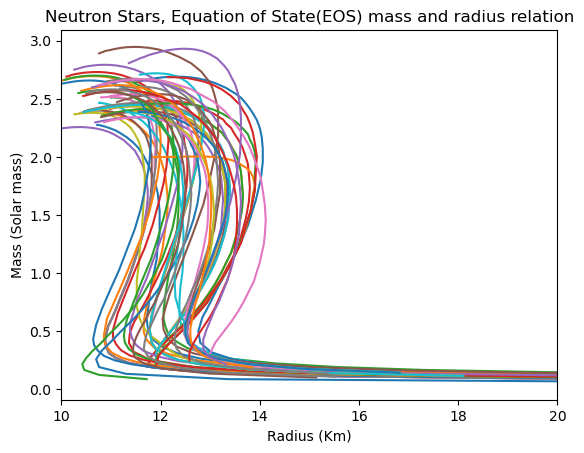

In [212]:
print_MR_A(EOS_dict)